In [4]:
import pandas as pd

# Load the dataset
arxiv_df = pd.read_csv(r"H:\braindead\braindead_1-2\ps2\filtered_data.csv")



In [5]:
print(arxiv_df.columns)


Index(['title', 'abstract'], dtype='object')


In [6]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from transformers import BartForConditionalGeneration, BartTokenizer, AdamW, get_scheduler
import torch.nn as nn

# Load datasets
compscholar_df = pd.read_csv(r"Brain Dead CompScholar Dataset.csv")
pubmed_df = pd.read_csv('pubmed_articles.csv')


tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")

# Preprocessing function
def preprocess_text(text):
    return tokenizer(text, padding="max_length", truncation=True, max_length=512, return_tensors="pt")


In [7]:
compscholar_df.isnull().sum()
compscholar_df.dropna(inplace=True)
pubmed_df.isnull().sum()
pubmed_df.dropna(inplace=True)  
arxiv_df.isnull().sum()
arxiv_df.dropna(inplace=True)

In [8]:
arxiv_df.duplicated().sum()



43

In [9]:

compscholar_df.duplicated().sum()


0

In [10]:
pubmed_df.duplicated().sum()

0

In [31]:
compscholar_df.rename(columns={'Paper Title': 'Title'}, inplace=True)


In [11]:
arxiv_df[arxiv_df.duplicated()]


,title,abstract
64052,A Diamond Structure in the Transducer Hierarchy,We answer an open question in the theory of ...
78389,Distributionally Robust Multiclass Classificat...,We develop a Distributionally Robust Optimiz...
109913,Causal Graph Discovery from Self and Mutually ...,We present a generalized linear structural c...
142197,Weak error analysis for strong approximation s...,We present an error analysis of weak converg...
166618,Novel structure-preserving schemes for stochas...,"Stochastic Klein--Gordon--Schr\""odinger (KGS..."
166651,Mover: Mask and Recovery based Facial Part Con...,Deepfake techniques have been widely used fo...
181340,Gravitational waves in scalar-tensor theory to...,We compute the gravitational waves generated...
182761,Solving Differential-Algebraic Equations in Po...,Power system dynamics are generally modeled ...
191334,Improving Generalizability of Graph Anomaly De...,Graph anomaly detection (GAD) is a vital tas...
208062,Impact of nuclear structure on longitudinal fl...,Fluctuations of harmonic flow along pseudora...


In [12]:
arxiv_df.drop_duplicates(inplace=True)


In [13]:
arxiv_df.rename(columns={'title': 'Title'}, inplace=True)


In [14]:
arxiv_df.rename(columns={'abstract': 'Abstract'}, inplace=True)


In [15]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARSHDIP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [19]:
from bs4 import BeautifulSoup 
import re           

def text_cleaner(text):
  #To include a list of permitted words of length <=2 in a list
    allowed_short_words=['it','us','uk','ky','bu']
    newChars = text.lower()
    newChars = BeautifulSoup(newChars, "lxml").text
    newChars = re.sub(r'\([^)]*\)', '', newChars)
    newChars = re.sub('"','', newChars)
    newChars = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newChars.split(" ")])    
    newChars = re.sub(r"'s\b","",newChars)
    newChars = re.sub("[^a-zA-Z]", " ", newChars) 
    tokens = [w for w in newChars.split() if not w in stop_words]
    long_words=[]
    
    for i in tokens:
        if (len(i)>=3 or i in allowed_short_words):                 
            long_words.append(i)   
    return (" ".join(long_words)).strip()
    

In [20]:
cleaned_text = []
for t in arxiv_df['Abstract']:
    cleaned_text.append(text_cleaner(t))


C:\Users\HARSHDIP\AppData\Local\Temp\ipykernel_17456\2514107432.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newChars = BeautifulSoup(newChars, "lxml").text


In [25]:
cleaned_text[0]


'generalities empirical diagnostics based emission lines photoionization modelling pending questions appendix lists useful lines deal'

In [33]:
def headlines_cleaner(text):
    newChars = re.sub('"','', text)
    newChars = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newChars.split(" ")])    
    newChars = re.sub(r"'s\b","",newChars)
    newChars = re.sub("[^a-zA-Z]", " ", newChars)
    newChars = newChars.lower()
    tokens=newChars.split()
    newChars=''
    for i in tokens:
        if len(i)>1:                                 
            newChars+=(i+' ')
    return newChars



In [26]:
arxiv_df["Abstract"]=cleaned_text

In [34]:
# Apply text_cleaner to Abstracts
compscholar_df['Abstract'] = compscholar_df['Abstract'].apply(text_cleaner)
pubmed_df['Abstract'] = pubmed_df['Abstract'].apply(text_cleaner)
# arxiv_df['Abstract'] = arxiv_df['Abstract'].apply(text_cleaner)

# Apply headlines_cleaner to Titles
compscholar_df['Title'] = compscholar_df['Title'].apply(headlines_cleaner)
pubmed_df['Title'] = pubmed_df['Title'].apply(headlines_cleaner)
arxiv_df['Title'] = arxiv_df['Title'].apply(headlines_cleaner)


In [35]:
import numpy as np
#Replacing the empty values in cleaned headlines with numpy.nan to say that it is a missing value so that **dropna** command drops the row.
compscholar_df['Title'].replace('', np.nan, inplace=True)
arxiv_df['Title'].replace('', np.nan, inplace=True)
pubmed_df['Title'].replace('', np.nan, inplace=True)
arxiv_df.dropna(axis=0,inplace=True)
compscholar_df.dropna(axis=0,inplace=True)
pubmed_df.dropna(axis=0,inplace=True) 

C:\Users\HARSHDIP\AppData\Local\Temp\ipykernel_17456\1748037498.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  compscholar_df['Title'].replace('', np.nan, inplace=True)
C:\Users\HARSHDIP\AppData\Local\Temp\ipykernel_17456\1748037498.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [36]:
arxiv_df.head(5)

,Title,Abstract
0,what can emission lines tell us,generalities empirical diagnostics based emiss...
1,the veldkamp space of two qubits,given remarkable representation generalized pa...
2,manifolds admitting tilde structure,find necessary sufficient condition compact ma...
3,axiom polynomial skew products of and their po...,polynomial skew product map form polynomials r...
4,factor analysis and alternating minimization,paper make first attempt understanding build o...


Compscholar Dataset Word Count Distribution:
    Text  Headlines
0     57          8
1     96          8
2     93          9
3     85         11
4    121          6
5     79         12
6    108         11
7     95          8
8    136         17
9    181         15
10   126          9
11   141         13
12   148          6
13   144         17
14   216          9
15    92          9
16    95         10
17   155         13
18   117         15
19   109         12

PubMed Dataset Word Count Distribution:
    Text  Headlines
0    153         24
1    148          6
2    146         14
3      2         18
4    187         29
5    142         23
6    166         22
7    158         15
8    153         18
9    133         17
10   138         22
11   160         15
12    39         12
13     2         12
14    29         14
15    39         13
16    86         15
17   146         15
18   187         21
19   184         22

ArXiv Dataset Word Count Distribution:
    Text  Headlines
0     15      

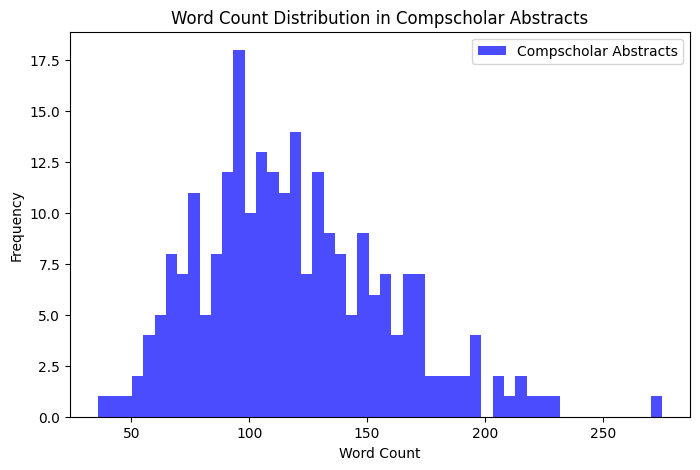

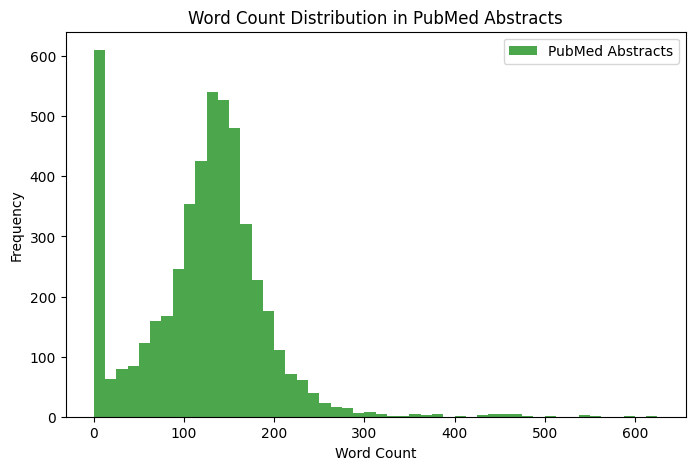

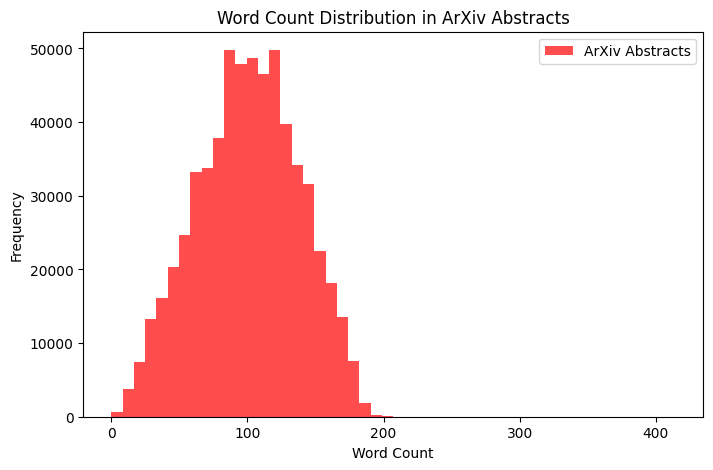

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Initialize lists to store word counts
text_cnt = {'Compscholar': [], 'PubMed': [], 'ArXiv': []}
headlines_cnt = {'Compscholar': [], 'PubMed': [], 'ArXiv': []}

# Function to count words in each dataset
def count_words(df, dataset_name):
    for i in df['Abstract']:
        text_cnt[dataset_name].append(len(i.split()))
    for i in df['Title']:
        headlines_cnt[dataset_name].append(len(i.split()))

# Count words for each dataset
count_words(compscholar_df, 'Compscholar')
count_words(pubmed_df, 'PubMed')
count_words(arxiv_df, 'ArXiv')

# Create DataFrames for length distributions
compscholar_dist = pd.DataFrame({'Text': text_cnt['Compscholar'], 'Headlines': headlines_cnt['Compscholar']})
pubmed_dist = pd.DataFrame({'Text': text_cnt['PubMed'], 'Headlines': headlines_cnt['PubMed']})
arxiv_dist = pd.DataFrame({'Text': text_cnt['ArXiv'], 'Headlines': headlines_cnt['ArXiv']})

# Display first 20 rows from each dataset
print("Compscholar Dataset Word Count Distribution:")
print(compscholar_dist.head(20))

print("\nPubMed Dataset Word Count Distribution:")
print(pubmed_dist.head(20))

print("\nArXiv Dataset Word Count Distribution:")
print(arxiv_dist.head(20))

# Plot separate histograms
def plot_histogram(dataset_name, color):
    plt.figure(figsize=(8, 5))
    plt.hist(text_cnt[dataset_name], bins=50, alpha=0.7, color=color, label=f"{dataset_name} Abstracts")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.title(f"Word Count Distribution in {dataset_name} Abstracts")
    plt.legend()
    plt.show()

# Plot separate graphs
plot_histogram("Compscholar", "blue")
plot_histogram("PubMed", "green")
plot_histogram("ArXiv", "red")


In [1]:
class SummarizationDataset(Dataset):
    def __init__(self, dataframe):
        self.input_ids = dataframe['Abstract'].apply(lambda x: preprocess_text(x)['input_ids'].squeeze(0)).tolist()
        self.attention_mask = dataframe['Abstract'].apply(lambda x: preprocess_text(x)['attention_mask'].squeeze(0)).tolist()
        self.labels = dataframe['Title'].apply(lambda x: preprocess_text(f"stok {x} etok")['input_ids'].squeeze(0)).tolist()

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]
        }

# Combine datasets
train_dataset = ConcatDataset([
    SummarizationDataset(arxiv_df),
    SummarizationDataset(pubmed_df)
])
test_dataset = SummarizationDataset(compscholar_df)


NameError: name 'Dataset' is not defined

In [15]:

class HybridSummarizer(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")

    def forward(self, input_ids, attention_mask, labels):
        return self.model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridSummarizer().to(device)

# Training Setup
optimizer = AdamW(model.parameters(), lr=2e-5)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)
num_training_steps = len(train_loader) * 3  # 3 epochs
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Training Loop
for epoch in range(3):
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
# Save the model
torch.save(model.state_dict(), "hybrid_summarizer.pth")
print("Model training complete. Saved as 'hybrid_summarizer.pth'.")

















In [ ]:
from datasets import load_metric


model.eval()
rouge = load_metric("rouge")

generated_summaries = []
reference_summaries = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = torch.stack(batch['input_ids']).to(device)
        attention_mask = torch.stack(batch['attention_mask']).to(device)
        labels = batch['labels']

        outputs = model.model.generate(input_ids, attention_mask=attention_mask, max_length=150)
        generated_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
        reference_texts = [tokenizer.decode(label, skip_special_tokens=True) for label in labels]

        generated_summaries.extend(generated_texts)
        reference_summaries.extend(reference_texts)

# Compute ROUGE Score
rouge_scores = rouge.compute(predictions=generated_summaries, references=reference_summaries)
print("ROUGE Scores:", rouge_scores)

In [ ]:
# import torch
# from transformers import BartForConditionalGeneration, BartTokenizer

# # Load tokenizer and model
# tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Initialize model and load trained weights
# model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")
# model.load_state_dict(torch.load("hybrid_summarizer.pth", map_location=device))
# model.to(device)
# model.eval()


In [ ]:
# def generate_summary(text, max_length=100):
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to(device)
#     summary_ids = model.generate(**inputs, max_length=max_length, num_beams=5, early_stopping=True)
#     return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# # Sample input abstracts
# test_abstracts = [
#     "Deep learning has revolutionized various AI applications. This paper explores novel techniques in transformer architectures.",
#     "A new approach to drug discovery using AI and quantum computing is proposed, significantly reducing time and cost."
# ]

# # Generate and print summaries
# for abstract in test_abstracts:
#     print("Abstract:", abstract)
#     print("Generated Summary:", generate_summary(abstract))
#     print("-" * 50)


In [ ]:
# from rouge_score import rouge_scorer

# # Reference (Ground Truth) Summaries
# reference_summaries = [
#     "Deep learning transforms AI with improved transformer models.",
#     "AI and quantum computing accelerate drug discovery."
# ]

# # Compute ROUGE Scores
# scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# for i, abstract in enumerate(test_abstracts):
#     generated_summary = generate_summary(abstract)
#     scores = scorer.score(reference_summaries[i], generated_summary)

#     print(f"Sample {i+1} ROUGE Scores:")
#     print("ROUGE-1:", scores['rouge1'].fmeasure)
#     print("ROUGE-2:", scores['rouge2'].fmeasure)
#     print("ROUGE-L:", scores['rougeL'].fmeasure)
#     print("-" * 50)


In [ ]:
# from rouge_score import rouge_scorer
# from sacrebleu import corpus_bleu
# import nltk

# # Download NLTK tokenizer
# nltk.download('punkt')

# def compute_rouge(reference_summaries, generated_summaries):
#     scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
#     scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

#     for ref, gen in zip(reference_summaries, generated_summaries):
#         score = scorer.score(ref, gen)
#         scores['rouge1'].append(score['rouge1'].fmeasure)
#         scores['rouge2'].append(score['rouge2'].fmeasure)
#         scores['rougeL'].append(score['rougeL'].fmeasure)

#     return {metric: sum(values) / len(values) for metric, values in scores.items()}

# def compute_bleu(reference_summaries, generated_summaries):
#     references = [[nltk.word_tokenize(ref)] for ref in reference_summaries]
#     hypotheses = [nltk.word_tokenize(gen) for gen in generated_summaries]
#     return corpus_bleu(hypotheses, references).score


In [ ]:
# def generate_summaries(model, test_loader, tokenizer):
#     model.eval()
#     generated_summaries = []
#     reference_summaries = []

#     with torch.no_grad():
#         for batch in test_loader:
#             input_ids = batch['input_ids'].to(device)
#             attention_mask = batch['attention_mask'].to(device)
#             labels = batch['labels']

#             outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=150)
#             generated_texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)
#             reference_texts = tokenizer.batch_decode(labels, skip_special_tokens=True)

#             generated_summaries.extend(generated_texts)
#             reference_summaries.extend(reference_texts)

#     return reference_summaries, generated_summaries


In [ ]:
# reference_summaries, generated_summaries = generate_summaries(model, test_loader, tokenizer)

# # Compute ROUGE Scores
# rouge_scores = compute_rouge(reference_summaries, generated_summaries)
# print("ROUGE Scores:", rouge_scores)

# # Compute BLEU Score
# bleu_score = compute_bleu(reference_summaries, generated_summaries)
# print("BLEU Score:", bleu_score)
